# This notebook contains scripts that generate figures of DMS experiment

In [ ]:
import pandas as pd
# This result file has been generated by multiprocess_dms_analysis.py script.
res_data = pd.read_csv("result_files/dms_analysis.csv")
res_data["pos_same_sibling_rate"] = res_data["sibling_count_pos"] / res_data["same_count_pos"]
res_data["neg_same_sibling_rate"] = res_data["sibling_count_neg"] / res_data["same_count_neg"]

In [4]:
res_data.head()

,Unnamed: 0,job_id,mat,tkz_path,is_bpe,v_size,freq_cutoff,sim_cutoff,same_count_pos,same_count_neg,sibling_count_pos,sibling_count_neg,pos_same_sibling_rate,neg_same_sibling_rate
0,0,0,blosum62,hf_uniref50_mutbpe_0.7_3_12_0_800.json,False,800,0.000,0.7,106479,70887,2939,1206,0.027602,0.017013
1,1,1,blosum62,hf_uniref50_mutbpe_0.7_3_12_0.1_51200.json,False,51200,0.100,0.7,96040,62329,10870,4463,0.113182,0.071604
2,2,2,blosum62,hf_uniref50_mutbpe_0.8_3_12_0.2_1600.json,False,1600,0.200,0.8,108055,71574,1516,526,0.014030,0.007349
3,3,3,blosum62,hf_uniref50_mutbpe_0.8_3_12_0.2_51200.json,False,51200,0.200,0.8,94573,61844,5391,1833,0.057004,0.029639
4,4,4,blosum62,hf_uniref50_mutbpe_0.8_3_12_0.005_800.json,False,800,0.005,0.8,110210,73335,1079,382,0.009790,0.005209


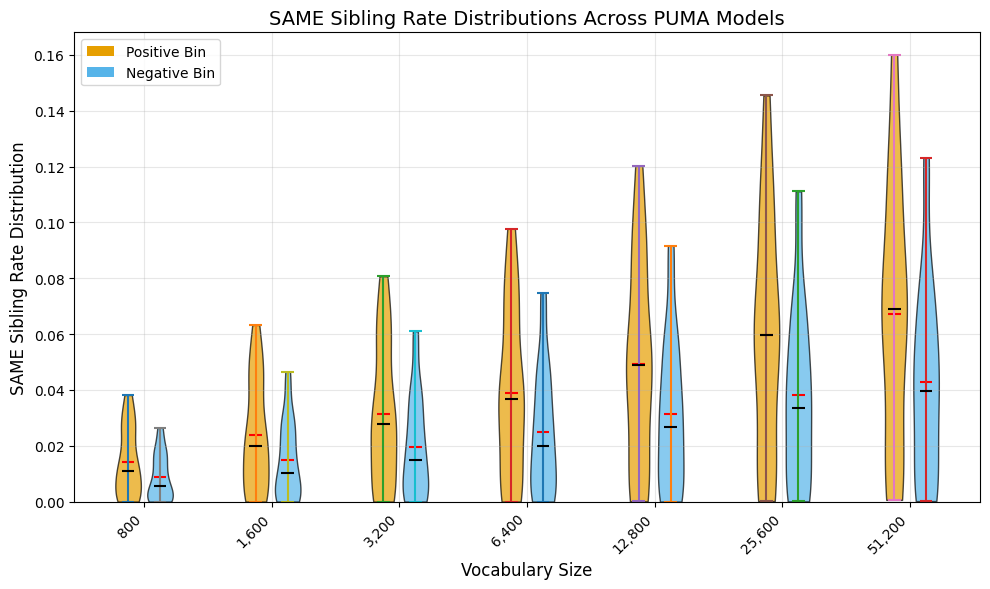

In [5]:
import matplotlib.pyplot as plt

# --- plot ---
fig, ax1 = plt.subplots(figsize=(10, 6))


colors = {
    "Positive Bin": "#E69F00", 
    "Negative Bin": "#56B4E9"
}

datasets = ["Positive Bin", "Negative Bin"]
offset = 0.25  # horizontal offset for separation
x_vals = sorted(res_data["v_size"].unique())

for i, dataset_str in enumerate(datasets):
    for j, ((v_size, ), final_group) in enumerate(res_data.groupby(["v_size"])):
        if i == 0: vals = final_group["pos_same_sibling_rate"].values
        else: vals = final_group["neg_same_sibling_rate"].values
        # print(v_size, vals)
        # plot violin, shifted for visibility
        parts = ax1.violinplot(
            vals,
            positions=[j + (i - 0.5) * offset],  # shift left/right
            widths=0.2,
            showmeans=True,
            showmedians=True,
        )
        # colorize
        for pc in parts['bodies']:
            pc.set_facecolor(colors[dataset_str])
            pc.set_edgecolor("black")
            pc.set_alpha(0.7)
        if 'cmedians' in parts:
            parts['cmedians'].set_color("black")
        if 'cmeans' in parts:
            parts['cmeans'].set_color("red")

# --- labels, legend, cosmetics ---
ax1.set_xticks(range(len(x_vals)))
ax1.set_xticklabels([f"{v:,}" for v in x_vals], rotation=45, ha="right")
ax1.set_xlabel("Vocabulary Size", fontsize=12)
ax1.set_ylabel("SAME Sibling Rate Distribution", fontsize=12)
ax1.set_ylim(bottom=0)
ax1.set_title("SAME Sibling Rate Distributions Across PUMA Models", fontsize=14)
ax1.grid(True, alpha=0.3)

# custom legend
from matplotlib.patches import Patch
legend_handles = [Patch(facecolor=colors[d], label=d) for d in datasets]
ax1.legend(handles=legend_handles)

plt.tight_layout()
# plt.savefig("samesiblingrate_dms.eps")
plt.show()
